In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Here is our function of interest and its derivative.

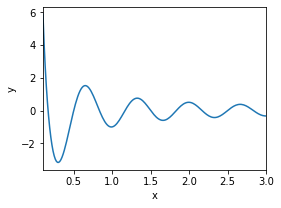

In [2]:
def f(x):
    return np.cos(3*np.pi*x)/x

def der_f(x):
    '''derivative of f(x)'''
    return -(3*np.pi*x*np.sin(3*np.pi*x)+np.cos(3*np.pi*x))/x**2

FUNC_RANGE = (0.1, 3) # the part of the function we will focus on

x = np.linspace(*FUNC_RANGE, 200)
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(x,f(x))
plt.xlim(x.min(), x.max());
plt.xlabel('x')
plt.ylabel('y');

These 2 functions are just here to help us visualize the gradient descent. You should inspect them later to see how the work.

In [3]:
def get_tangent_line(x, x_range=.5):
    '''returns information about the tangent line of f(x)
       at a given x
       Returns:
       x: np.array - x-values in the tangent line segment
       y: np.array - y-values in tangent line segment
       m: float - slope of tangent line'''
    y = f(x)
    m = der_f(x)
    # get tangent line points
    # slope point form: y-y_1 = m(x-x_1)
    # y = m(x-x_1)+y_1
    x1, y1 = x, y
    x = np.linspace(x1-x_range/2, x1+x_range/2, 50)
    y = m*(x-x1)+y1
    return x, y, m

def plot_it(cur_x, title='', ax=plt):
    '''plots the point cur_x on the curve f(x) as well as
       the tangent line on f(x) where x=cur_x'''
    y = f(x)
    ax.plot(x,y)
    ax.scatter(cur_x, f(cur_x), c='r', s=80, alpha=1);
    x_tan, y_tan, der = get_tangent_line(cur_x)
    ax.plot(x_tan, y_tan, ls='--', c='r')
    # indicate if our location is outside the x range
    if cur_x > x.max():
        ax.axvline(x.max(), c='r', lw=3)
        ax.arrow(x.max()/1.6, y.max()/2, x.max()/5, 0, color='r', head_width=.25)
    if cur_x < x.min():
        ax.axvline(x.min(), c='r', lw=3)
        ax.arrow(x.max()/2.5, y.max()/2, -x.max()/5, 0, color='r', head_width=.25)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-3.5, 3.5)
    ax.set_title(title)

Set a learning rate between 1 and 0.001. Then fill in the blanks to:
1. Find the derivative, `delta`, of `f(x)` where `x = cur_x`
2. Update the current value of x, `cur_x`
3. Create the boolean expression `has_converged` that ends the algorithm if `True` 

You can experiment with how different values for `learning_rate` and `epsilon` affect your results.

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(15,8), sharey=True)

cur_x = 0.75 # initial value of x

learning_rate = 0.001 # controls how large our update steps are
epsilon = 0.025 # minimum update magnitude

for i, ax in enumerate(axs.ravel()):
    plot_it(cur_x, title=f"{i} step{'' if i == 1 else 's'}", ax=ax)
    
    prev_x = cur_x # remember what x was
    delta = der_f(prev_x) # find derivative
    cur_x = prev_x - delta * learning_rate # update current x-value
    
    # stop algorithm if we've converged
    has_converged = np.abs(f(cur_x) - f(prev_x)) <= epsilon # boolean expression (consider epsilon)
    if has_converged:
        # hide unused subplots
        for ax in axs.ravel()[i+1:]:
            ax.axis('off') 
        break
plt.tight_layout()

if i == len(axs.ravel())-1:
    print('Did not converge!')

Did not converge!


Did you get $x$ to converge to a local minimum? Did it converge at all? If not, how would you describe the problem? What might we do to address this issue?